> **Table of Contents:**
> * [Overview of the Competition](#1)
> * [Importing Libraries](#2)
> * [Loading Data](#3)
> * [EDA - Exploratory Data Analysis](#4)
> * [PreProcessing](#5)
> * [Data Visualization](#6)
> * [Data Modeling](#7)
> * [Submission](#8)
> ---

<a id="1"></a> 
# Overview of the Competition
The competing Kaggle merchandise stores we saw in January's Tabular Playground are at it again. This time, they're selling books!


The task for this month's competitions is a bit more complicated. Not only are there six countries and four books to forecast, but you're being asked to forecast sales during the tumultuous year 2021. Can you use your data science skills to predict book sales when conditions are far from the ordinary?


In this notebook, we will be exploring the dataset and visualize the relationships of every column through graphs are representation.We will then preprocess the data and perform some feature engineering in order to be able to fit the train data into different machine learning models. After that, we will evaluate the models using different metrics to determine which model will perform best on the current dataset.

Note:
This notebook is inspired from this [notebook](http://www.kaggle.com/code/vencerlanz09/tps-eda-9-models-explanation#%F0%9F%93%8AAll-Model-Results)

---

<a id="2"></a> 
# 1. Importing Libraries 😀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Estimators
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

<a id="3"></a> 
# 2. Loading the Data 📅

In [2]:
df_train =pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv',index_col=0,parse_dates=['date']) # index col is set to zero as it is the index, so no need to have 2 indexes, just set it as index.
df_train.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [3]:
df_test =pd.read_csv('../input/tabular-playground-series-sep-2022/test.csv',index_col=0,parse_dates=['date'])
df_test.head()

,date,country,store,product
row_id,,,,
70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


<a id="4"></a> 
# 3. Let's Explore 👓 - Exploratory Data Analysis

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      70128 non-null  datetime64[ns]
 1   country   70128 non-null  object        
 2   store     70128 non-null  object        
 3   product   70128 non-null  object        
 4   num_sold  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.2+ MB


In [5]:
df_train.shape, df_test.shape 

((70128, 5), (17520, 4))

## 3.B. Checking for Null values 🤔

In [6]:
#checking for null values in train data
df_train.isnull().sum()

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [7]:
#checking for null values in test data
df_test.isnull().sum()

date       0
country    0
store      0
product    0
dtype: int64

## 3.C. Checking for Duplicate values

In [8]:
#Checking for duplicate rows
df_train.duplicated().sum()

0

In [9]:
df_train.describe()

,num_sold
count,70128.000000
mean,194.296986
std,126.893874
min,19.000000
25%,95.000000
50%,148.000000
75%,283.000000
max,986.000000


In [10]:
display('Train Data',df_train.describe(include='object')),display('Test Data',df_test.describe(include='object'))

'Train Data'

,country,store,product
count,70128,70128,70128
unique,6,2,4
top,Belgium,KaggleMart,Kaggle Advanced Techniques
freq,11688,35064,17532


'Test Data'

,country,store,product
count,17520,17520,17520
unique,6,2,4
top,Belgium,KaggleMart,Kaggle Advanced Techniques
freq,2920,8760,4380


(None, None)

- There are 6 unique countries.
- There are 2 stores in this dataframe.
- We are studying data for 4 products.
- Test data is for an year.

In [11]:
# checking for timeline of train and test data
display('Train_data:' ,'---------',df_train.date.min(),'---------',df_train.date.max())

'Train_data:'

'---------'

Timestamp('2017-01-01 00:00:00')

'---------'

Timestamp('2020-12-31 00:00:00')

In [12]:
display('Test_data:','---------',df_test.date.min(),'---------',df_test.date.max())

'Test_data:'

'---------'

Timestamp('2021-01-01 00:00:00')

'---------'

Timestamp('2021-12-31 00:00:00')

**Train Data is for year 2017,2018,2019 and 2020 while
Test Data is for year 2021**

In [13]:
df_train.nunique()

date        1461
country        6
store          2
product        4
num_sold     699
dtype: int64

In [14]:
countries = df_train['country'].unique().tolist()
countries

['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain']

In [15]:
products = df_train['product'].unique().tolist()
products

['Kaggle Advanced Techniques',
 'Kaggle Getting Started',
 'Kaggle Recipe Book',
 'Kaggle for Kids: One Smart Goose']

In [16]:
stores =  df_train['store'].unique().tolist()
stores

['KaggleMart', 'KaggleRama']

In [17]:
df_train.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


<a id="5"></a> 
# 4. Preprocessing  🤠

In [18]:
df_train["year"] = df_train["date"].dt.year
df_train["month"] = df_train["date"].dt.month
df_train["day_of_week"] = df_train["date"].dt.dayofweek
df_train["day_of_year"] = df_train["date"].dt.dayofyear

In [19]:
df_test["year"] = df_test["date"].dt.year
df_test["month"] = df_test["date"].dt.month
df_test["day_of_week"] = df_test["date"].dt.dayofweek
df_test["day_of_year"] = df_test["date"].dt.dayofyear

<a id="6"></a> 
# 5. Data Visualization 🤩

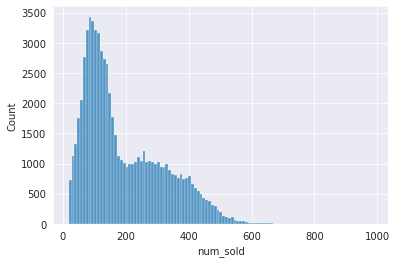

In [20]:
sns.histplot(df_train['num_sold']);

In [21]:
product_df = df_train.groupby(["date","product"])["num_sold"].sum().reset_index()
product_df

,date,product,num_sold
0,2017-01-01,Kaggle Advanced Techniques,4267
1,2017-01-01,Kaggle Getting Started,3492
2,2017-01-01,Kaggle Recipe Book,2900
3,2017-01-01,Kaggle for Kids: One Smart Goose,4693
4,2017-01-02,Kaggle Advanced Techniques,3242
...,...,...,...
5839,2020-12-30,Kaggle for Kids: One Smart Goose,5699
5840,2020-12-31,Kaggle Advanced Techniques,4968
5841,2020-12-31,Kaggle Getting Started,3780
5842,2020-12-31,Kaggle Recipe Book,3301


In [22]:
product_df.describe()

,num_sold
count,5844.000000
mean,2331.563826
std,663.726491
min,1168.000000
25%,1791.750000
50%,2314.500000
75%,2779.000000
max,5827.000000


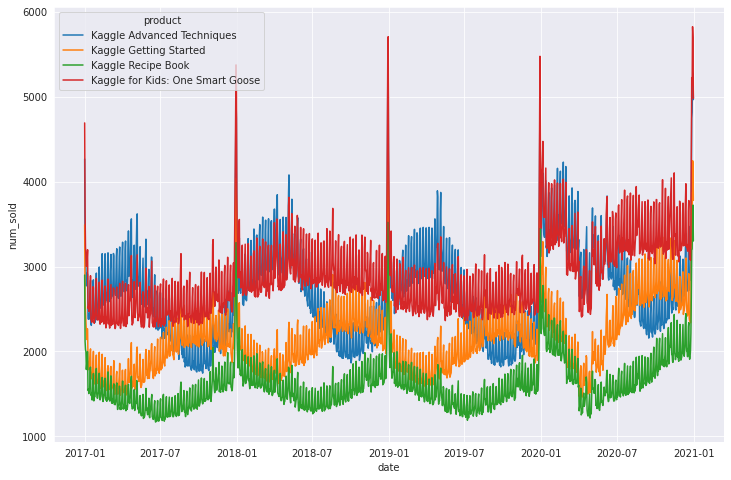

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="product");

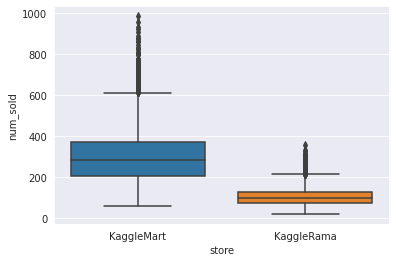

In [24]:
sns.boxplot(x='store',y='num_sold',data=df_train);

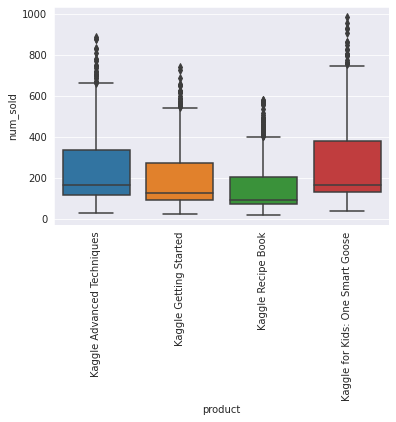

In [25]:
sns.boxplot(x='product',y='num_sold',data=df_train)
plt.xticks(rotation=90);

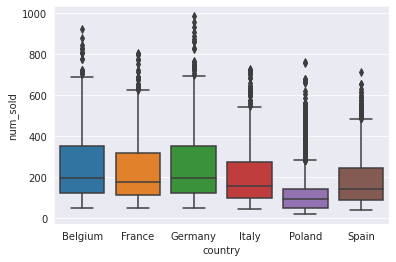

In [26]:
sns.boxplot(x='country',y='num_sold',data=df_train);

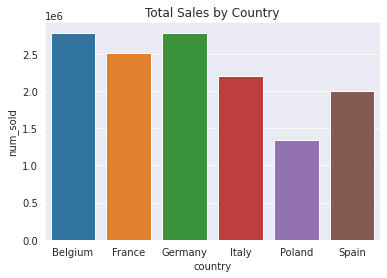

In [27]:
data=df_train.groupby('country').sum('num_sold')
sns.barplot(data=data,x=data.index,y='num_sold')
plt.title('Total Sales by Country');

In [28]:
weekly_df = df_train.groupby(["country","store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = df_train.groupby(["country","store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

In [29]:
def plot_all(df):
    f,axes = plt.subplots(2,2,figsize=(20,15), sharex = True, sharey=True)
    f.tight_layout()
    for n,prod in enumerate(df["product"].unique()):
        plot_df = df.loc[df["product"] == prod]
        sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store",ax=axes[n//2,n%2])
        axes[n//2,n%2].set_title("Product: "+str(prod))

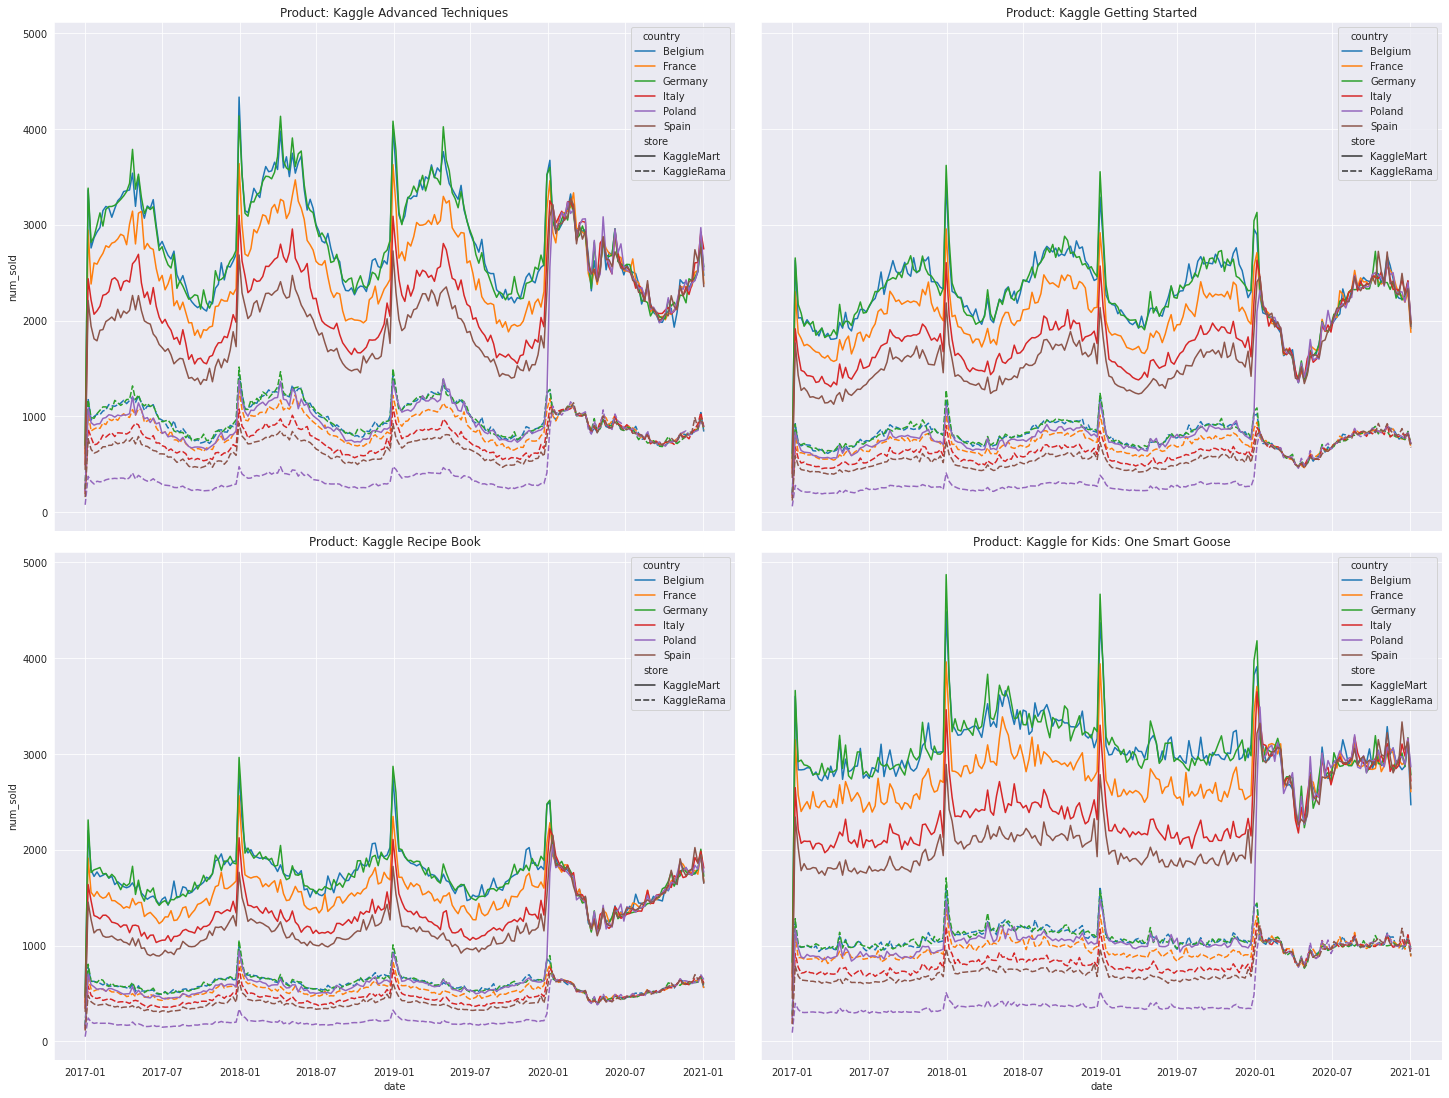

In [30]:
plot_all(weekly_df)

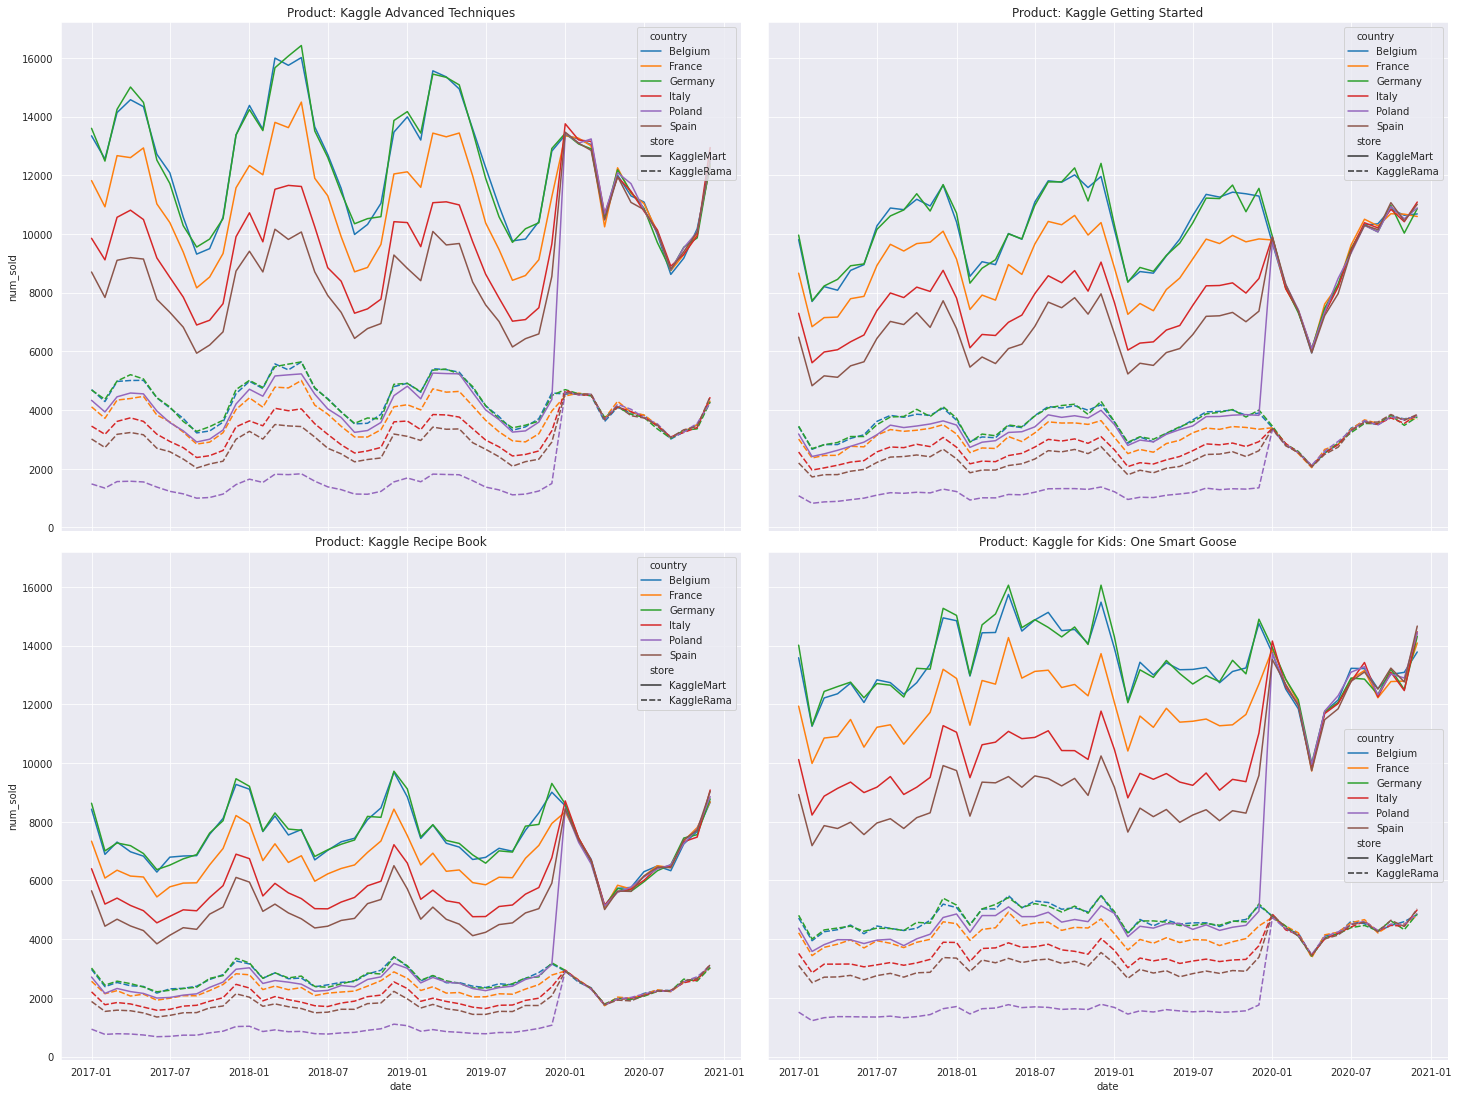

In [31]:
plot_all(monthly_df)

### The Data is constant for the year 2020 for both stores and products. This is very suspicious and makes the date column for prediction unuseful.

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         70128 non-null  datetime64[ns]
 1   country      70128 non-null  object        
 2   store        70128 non-null  object        
 3   product      70128 non-null  object        
 4   num_sold     70128 non-null  int64         
 5   year         70128 non-null  int64         
 6   month        70128 non-null  int64         
 7   day_of_week  70128 non-null  int64         
 8   day_of_year  70128 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 7.4+ MB


In [33]:
#encoder = LabelEncoder()
#def encode_data(data, categories=['country', 'store', 'product']):
    #for cat in categories:
        #data[cat] = encoder.fit_transform(data[[cat]])
    #return data

In [34]:
#train = encode_data(df_train)
#test = encode_data(df_test)

In [35]:
train = pd.get_dummies(df_train, columns=['country', 'store', 'product'], drop_first=True)
test =  pd.get_dummies(df_test, columns=['country', 'store', 'product'], drop_first=True)

In [36]:
# Splitting the data
X = train.drop(['num_sold', 'date'], axis=1)
y = train.num_sold

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [37]:
# Function to calculate metric results
def calculate_results(y_true, y_pred):
    # Calculate model Mean Absolute Error (MAE)
    model_mae = mean_absolute_error(y_val, y_pred)
    # Calculate model Mean Squrared Error (MSE)
    model_mse = mean_squared_error(y_val, y_pred)
    # Calculate model Root Mean Squared Error (RMSE)
    model_rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    # Calculate Adjusted R2_score
    model_r2 = r2_score(y_val, y_pred)
    # Calculate Root Mean Squared Log Error
    model_rmsle = np.log(np.sqrt(mean_squared_error(y_val, y_pred)))
    
    
    model_results = {"Mean Absolute Error (MAE)": model_mae,
                     "Mean Squared Error (MSE)": model_mse,
                     "Root Mean Squared Error (RMSE)": model_rmse,
                     "Adjusted R^2 Score": model_r2,
                     "Root Mean Squared Log Error": model_rmsle}
    return model_results

<a id="7"></a> 
# 6. Data Modeling  🤖

I used GridSearchCV to get the best parameters: {'regressor__n_estimators': 100,
 'regressor__max_depth': 6,
 'regressor__learning_rate': 0.1}

In [38]:
# Predict using Ridge Regression
xgb_model = xgb.XGBRegressor(params={'regressor__n_estimators': 120, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.1})
y_pred = xgb_model.fit(X_train, y_train).predict(X_val)
    
xgb_results = calculate_results(y_val, y_pred)
pd.DataFrame(xgb_results ,index=['values']).T

[18:02:21] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




,values
Mean Absolute Error (MAE),9.182869
Mean Squared Error (MSE),192.914041
Root Mean Squared Error (RMSE),13.889350
Adjusted R^2 Score,0.987945
Root Mean Squared Log Error,2.631122


In [39]:
predictions= xgb_model.fit(X,y).predict(test.drop('date',axis=1))

[18:02:24] WARNING: ../src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [40]:
# Feature importances
pd.DataFrame({'Feature': X.columns,'Importance': xgb_model.feature_importances_}).sort_values(by=['Importance'], ascending=False).reset_index(drop=True)

,Feature,Importance
0,store_KaggleRama,0.414426
1,country_Poland,0.188829
2,product_Kaggle Recipe Book,0.119813
3,country_Spain,0.051238
4,product_Kaggle Getting Started,0.048867
5,year,0.044820
6,country_Italy,0.041007
7,product_Kaggle for Kids: One Smart Goose,0.027894
8,day_of_week,0.018148
9,country_Germany,0.015209


<a id="8"></a> 
# 7. Submission  -Finally 😎

In [41]:
submissions=pd.read_csv('../input/tabular-playground-series-sep-2022/sample_submission.csv')
submissions['num_sold']=predictions//1

In [42]:
submissions.head()

,row_id,num_sold
0,70128,496.0
1,70129,405.0
2,70130,338.0
3,70131,518.0
4,70132,156.0


In [43]:
submissions.to_csv('submission.csv', index = False)

### <center>Thanks for reading:)</center>
### <center>Upvote! and Leave some suggestions</center>